In [32]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras import losses
import matplotlib.pyplot as plt

from dva.autoencoder import Autoencoder

In [2]:
digits = datasets.load_digits(n_class=2)
digits.data.shape

(360, 64)

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  8.,  1.,  0.],
       [ 0.,  0.,  6., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [4]:
digits.target

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [34]:
zeroes_idx = np.argwhere(digits.target == 0).ravel()
ones_idx = np.argwhere(digits.target == 1).ravel()

sc = StandardScaler()
data = sc.fit_transform(digits.data)

# making dataset of zeroes with 2 'abnormal' ones
train = np.concatenate((data[zeroes_idx[:-20]], data[ones_idx[0:2]]))
valid = np.concatenate((data[zeroes_idx[-20:-8]], data[ones_idx[2:4]]))
test = np.concatenate((data[zeroes_idx[-8:]], data[ones_idx[5:6]]))

In [35]:
mod = Autoencoder(8)
mod.compile(optimizer='adam', loss=losses.MeanSquaredError())
mod.fit(train, train, epochs=20, shuffle=True, validation_data=(valid, valid))

Epoch 1/20
5/5 [==============================] - 0s 32ms/step - loss: 0.8275 - val_loss: 0.7367
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8395 - val_loss: 0.7322
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8809 - val_loss: 0.7261
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: 0.7882 - val_loss: 0.7178
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 0.7884 - val_loss: 0.7069
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 0.7653 - val_loss: 0.6930
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.7481 - val_loss: 0.6756
Epoch 8/20
5/5 [==============================] - 0s 8ms/step - loss: 0.7259 - val_loss: 0.6553
Epoch 9/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6805 - val_loss: 0.6330
Epoch 10/20
5/5 [==============================] - 0s 9ms/step - loss: 0.6626 - val_loss: 0.6100
Epoch 11/20
5/5 [=====================

In [36]:
loss = ((mod.predict(test) - test) ** 2).sum(1)
(loss - np.min(loss)) / (np.max(loss) - np.min(loss))

array([0.86243648, 0.28553453, 0.23193178, 0.22057891, 0.21183557,
       0.11785611, 0.23127148, 0.        , 1.        ])

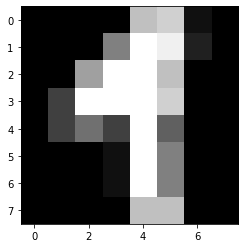

In [38]:
plt.imshow(digits.data[ones_idx[5:6]].reshape(8, 8))
plt.gray()
plt.show()